### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

### Read Data

In [2]:
data = pd.read_csv("iphone_purchase_records.csv")

In [3]:
print(data.head())

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [4]:
print(data.shape)

(400, 4)


### Checking Columns

In [5]:
print(data.columns)

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None


In [7]:
print(data.describe())

              Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.000000         0.000000
75%     46.000000   88000.000000         1.000000
max     60.000000  150000.000000         1.000000


### Checking for the null values

In [8]:
print(data.isnull().sum())

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64


### Corelation works on  only with numerical data.
### Drop the Gender Column

In [9]:
print(data.drop(columns = ["Gender"],inplace = True))

None


In [10]:
print(data.head())

   Age  Salary  Purchase Iphone
0   19   19000                0
1   35   20000                0
2   26   43000                0
3   27   57000                0
4   19   76000                0


In [11]:
print(data.corr())

                      Age    Salary  Purchase Iphone
Age              1.000000  0.155238         0.622454
Salary           0.155238  1.000000         0.362083
Purchase Iphone  0.622454  0.362083         1.000000


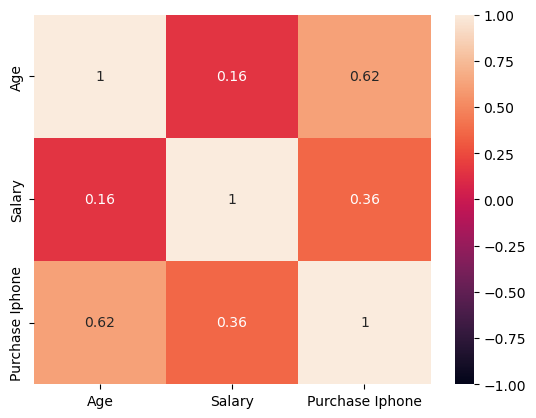

In [12]:
sns.heatmap(data.corr(),annot = True,vmin = -1)
plt.show()

### Now our data is Ready to split

In [13]:
#### Spliting the data into x and y
x = data[["Age","Salary"]]
y = data["Purchase Iphone"]

In [14]:
print(x.head())

   Age  Salary
0   19   19000
1   35   20000
2   26   43000
3   27   57000
4   19   76000


In [15]:
print(x.shape)

(400, 2)


In [16]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Purchase Iphone, dtype: int64


In [17]:
print(y.shape)

(400,)


### Spliting into train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [19]:
print(x_train.shape)

(320, 2)


In [20]:
print(x_test.shape)

(80, 2)


In [21]:
print(y_train.shape)

(320,)


In [22]:
print(y_test.shape)

(80,)


In [23]:
model = DecisionTreeClassifier(criterion = "entropy",random_state = 123)
print("Model is Loaded")

Model is Loaded


In [24]:
model_fit = model.fit(x_train,y_train)
print("Model is learn")

Model is learn


### Predicted by Matrix

In [25]:
pred = model.predict(x_test)
print(pred)

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 0]


### Checking the Accuracy of the the testing data by Confusion matrix

In [26]:
confusion_matrix(y_test,pred)

array([[46,  6],
       [ 7, 21]], dtype=int64)

In [27]:
accuracy_score(y_test,pred)

0.8375

### Pridicted by AUC_ROC Curve

In [28]:
pred1 = model.predict_proba(x_test)[:,1]

In [29]:
print(pred1)

[1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0.]


In [30]:
### Create a dataframe
test_df = pd.DataFrame({"Actual":y_test,"decision_Tree":pred1})
print(test_df)

     Actual  decision_Tree
209       0            1.0
280       1            1.0
33        0            0.0
210       1            0.0
93        0            0.0
..      ...            ...
246       0            0.0
227       1            1.0
369       1            1.0
176       0            0.0
289       1            0.0

[80 rows x 2 columns]


### Checking the Accuracy of the testing data by AUC_ROC_CURVE

In [31]:
for model1 in ["decision_Tree"]:
    fpr,tpr,thresh = roc_curve(test_df["Actual"],test_df[model1])
    print(model1)
    auc_roc = auc(fpr,tpr)
    print(auc_roc)

decision_Tree
0.8173076923076922


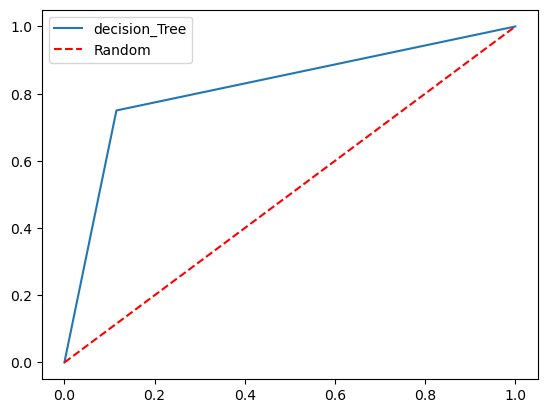

In [32]:
for model1 in ["decision_Tree"]:
    fpr,tpr,thresh = roc_curve(test_df["Actual"],test_df[model1])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = f'{model1}')
    plt.plot([0,1],"r--",label = "Random")
    plt.legend()
    plt.show()